chi_squared 120.87286206138864
R2 0.9795210837834857


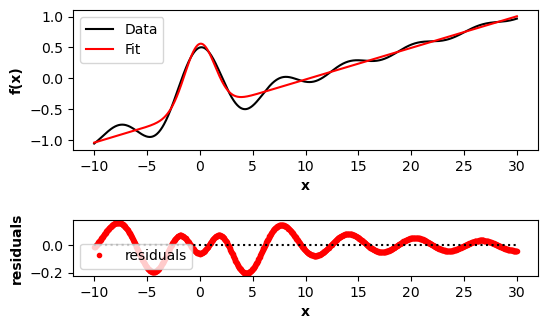

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define a Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Define a linear function
def linear(x, m, b):
    return m * x + b

# Define a conjuctive model as the sum of the Gaussian and linear functions
def conjuctive_model(x, A, mu, sigma, m, b):
    return gaussian(x, A, mu, sigma) + linear(x, m, b)

# Generate some sample data
x = np.linspace(-10, 30, 1000)
y = np.sin(x)/x + np.linspace(-1, 1, len(x))

# Fit the data to the conjuctive model
params, covariance = curve_fit(conjuctive_model, x, y)

# Extract the optimized parameters
A_opt, mu_opt, sigma_opt, m_opt, b_opt = params

# Generate the fitted curve
y_fit = conjuctive_model(x, *params)

fig, ax = plt.subplots(nrows = 2, figsize = (6,4))

# Plot the original data and the fitted curve
ax[0].plot(x, y, 'k', label='Data')
ax[0].plot(x, y_fit, 'r', label='Fit')
ax[0].set_xlabel('x', weight = 'bold')
ax[0].set_ylabel('f(x)', weight = 'bold')
ax[0].legend()

residuals = y - conjuctive_model(x, *params)
chi_squared = sum(residuals**2 / conjuctive_model(x, *params))
r_squared = 1 - (sum(residuals**2) / sum((y - np.mean(y))**2))

plt.gca().set_aspect(13)
ax[1].plot(x, residuals, 'r.', label = 'residuals')
ax[1].plot(x, np.zeros(len(x)), 'k:')
ax[1].set_xlabel('x', weight = 'bold')
ax[1].set_ylabel('residuals', weight = 'bold')
ax[1].legend()

# plt.xticks(weight = 'bold')
# plt.yticks(weight = 'bold')

print('chi_squared', chi_squared)
print('R2', r_squared)